http://colorbrewer2.org
    
Choosing the **number of data classes** is an important part of map design. Increasing the number of data classes will result in a more "information rich" map by decreasing the amount of data generalization. However, too many data classes may overwhelm the map reader with information and distract them from seeing general trends in the distribution. In addition, a large numbers of classes may compromise map legibility—more classes require more colors that become increasingly difficult to tell apart.

Many cartographers advise that you use five to seven classes for a choropleth map. Isoline maps, or choropleth maps with very regular spatial patterns, can safely use more data classes because similar colors are seen next to each other, making them easier to distinguish.

1. **Sequential schemes** are suited to ordered data that progress from low to high. Lightness steps dominate the look of these schemes, with light colors for low data values to dark colors for high data values. sequential
2. **Diverging schemes** put equal emphasis on mid-range critical values and extremes at both ends of the data range. The critical class or break in the middle of the legend is emphasized with light colors and low and high extremes are emphasized with dark colors that have contrasting hues.
3. **Qualitative schemes** do not imply magnitude differences between legend classes, and hues are used to create the primary visual differences between classes. Qualitative schemes are best suited to representing nominal or categorical data.

In [3]:
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def str2rgb(text):
    return tuple(int(i) for i in re.findall("\d+", text))
    
def rgb2hex(rgb):    
    return '#%02x%02x%02x' % rgb

In [4]:
colorbrewer = json.load(open('colorbrewer.json'))
colorbrewer.keys()

dict_keys(['Spectral', 'RdYlGn', 'RdBu', 'PiYG', 'PRGn', 'RdYlBu', 'BrBG', 'RdGy', 'PuOr', 'Set2', 'Accent', 'Set1', 'Set3', 'Dark2', 'Paired', 'Pastel2', 'Pastel1', 'OrRd', 'PuBu', 'BuPu', 'Oranges', 'BuGn', 'YlOrBr', 'YlGn', 'Reds', 'RdPu', 'Greens', 'YlGnBu', 'Purples', 'GnBu', 'Greys', 'YlOrRd', 'PuRd', 'Blues', 'PuBuGn'])

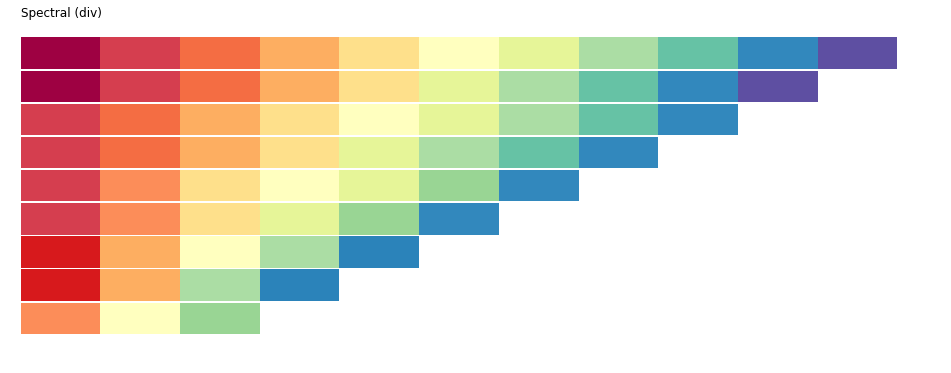

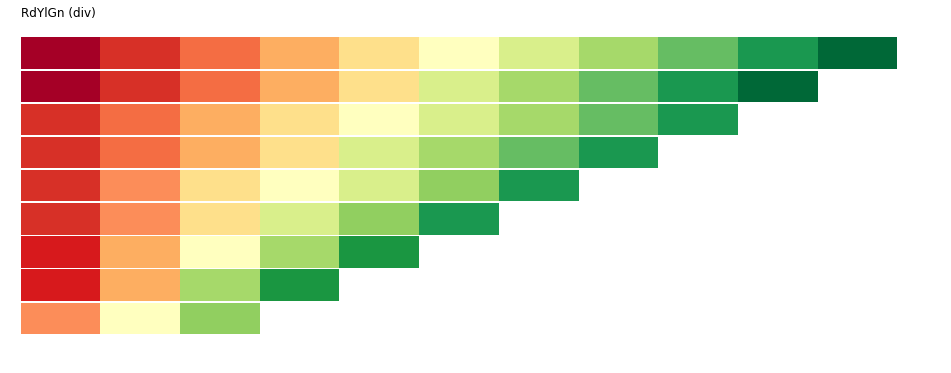

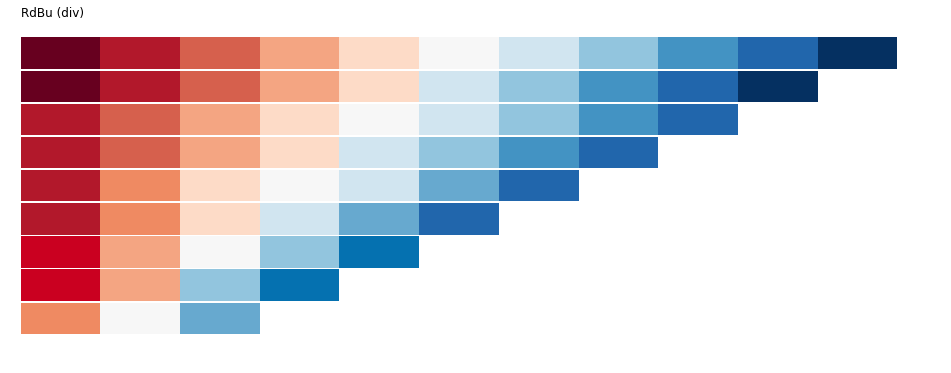

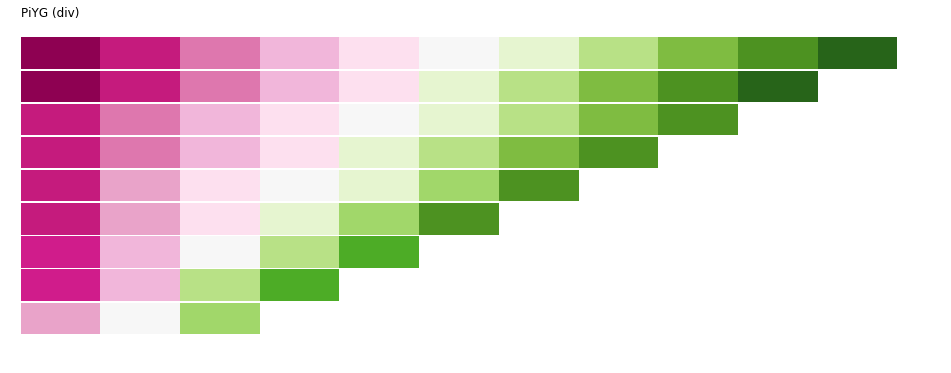

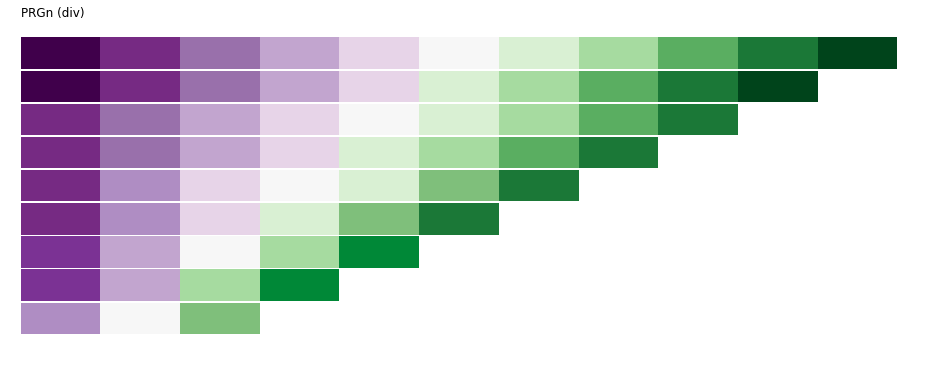

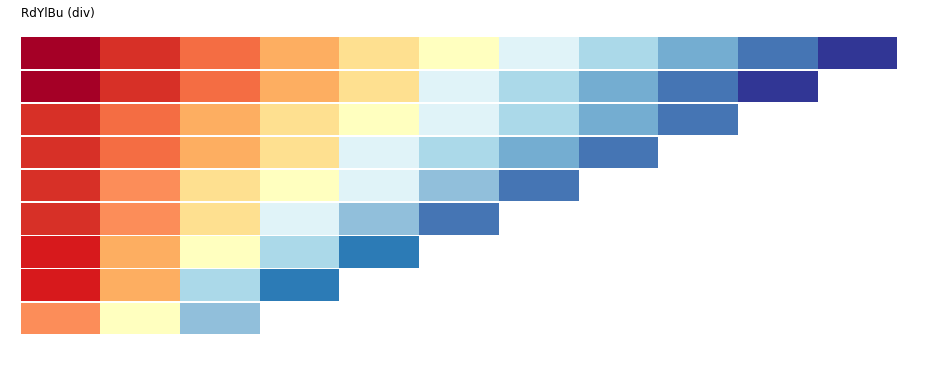

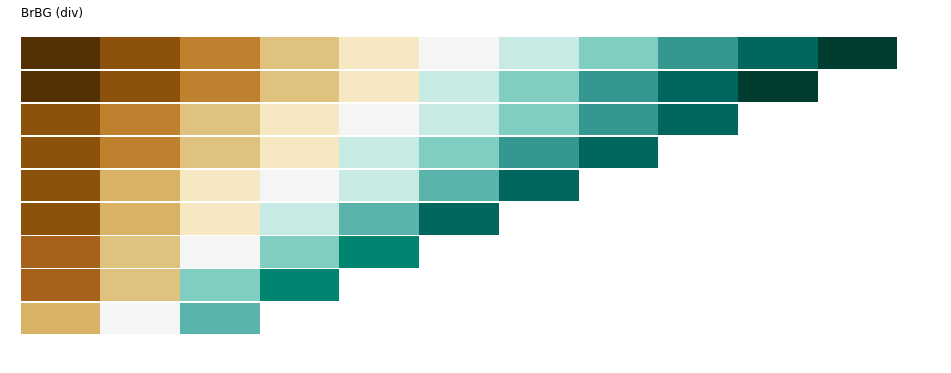

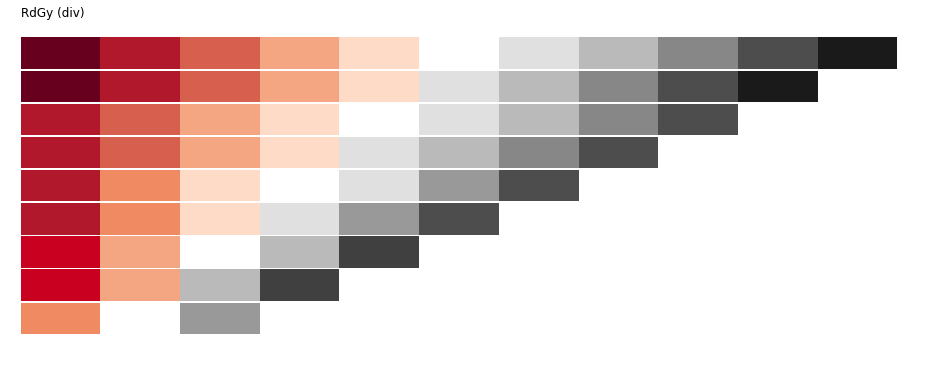

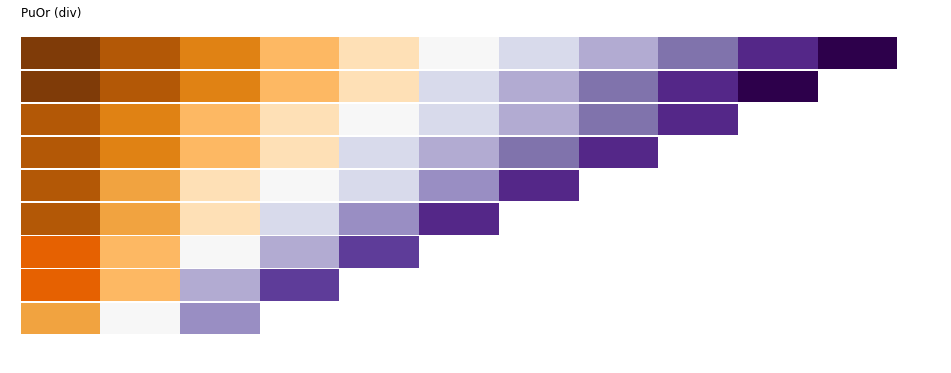

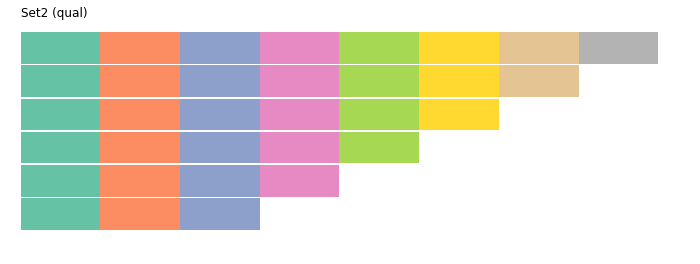

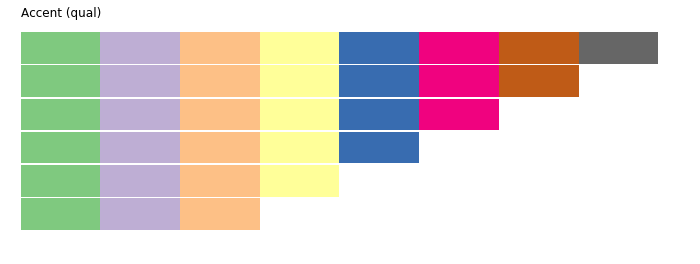

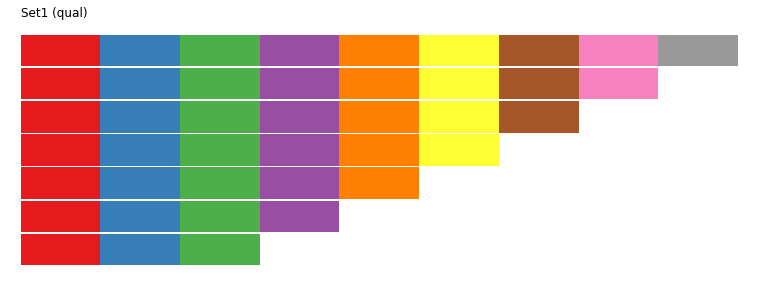

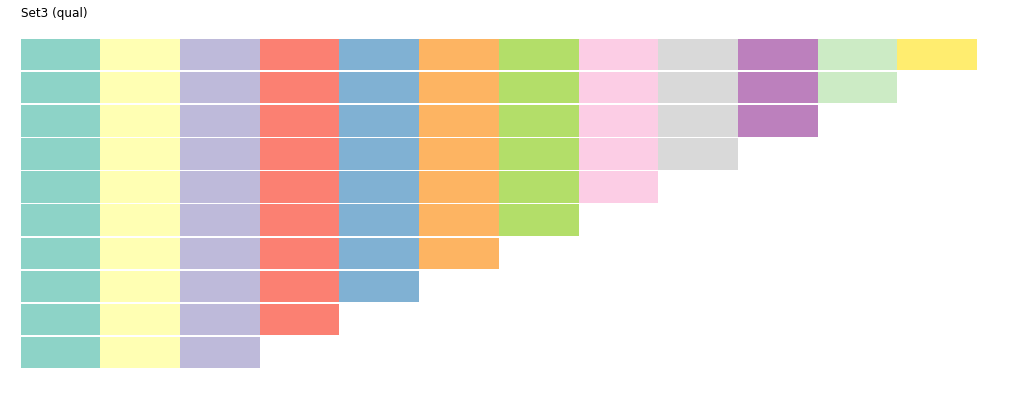

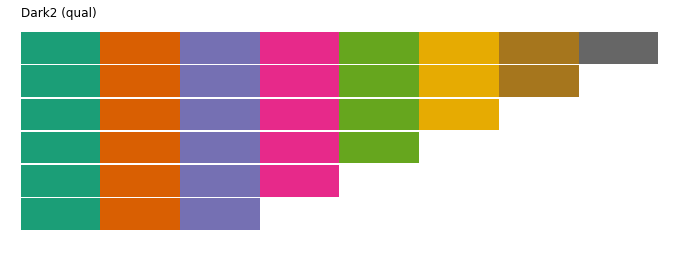

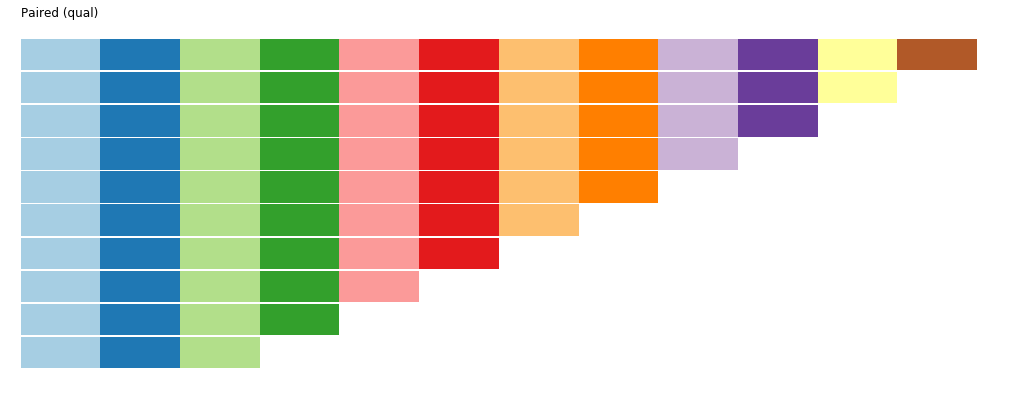

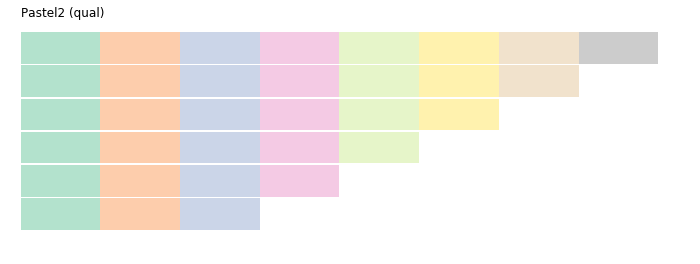

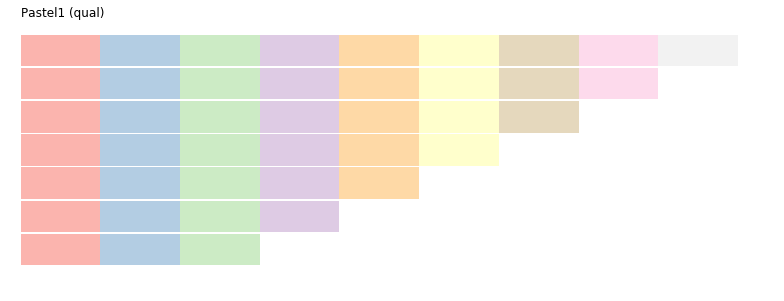

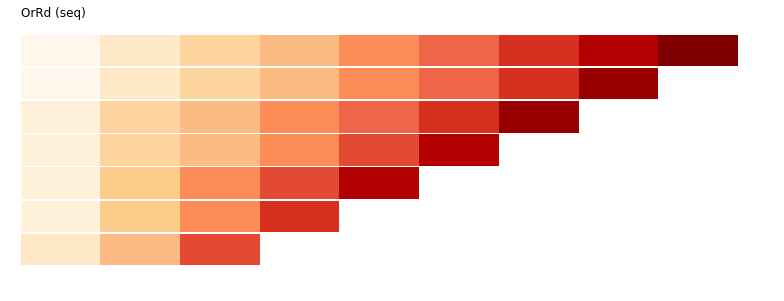

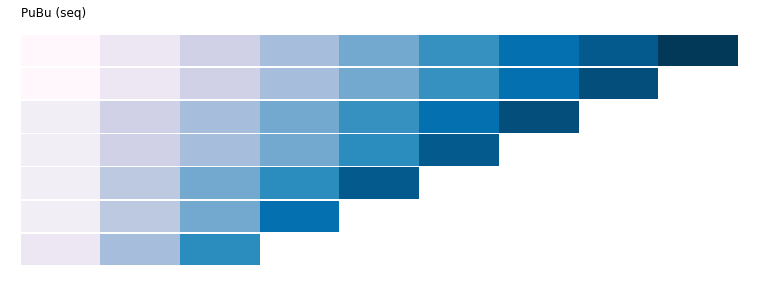

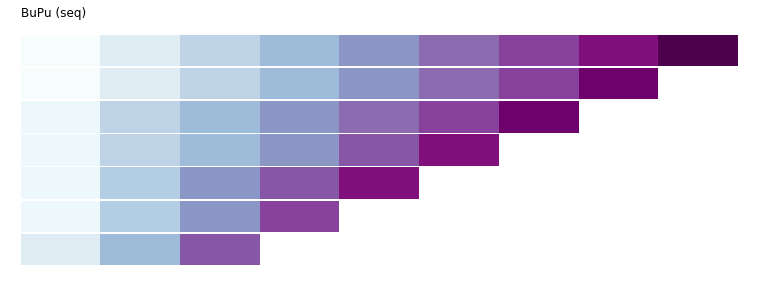

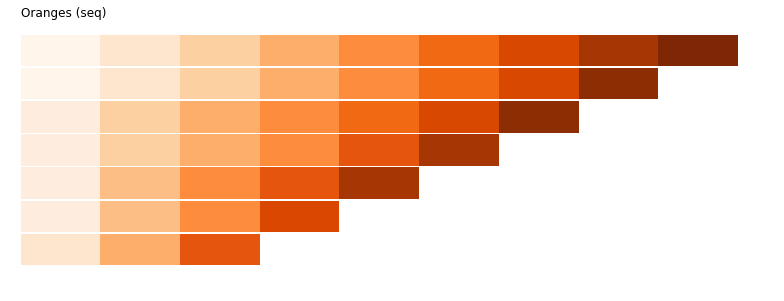

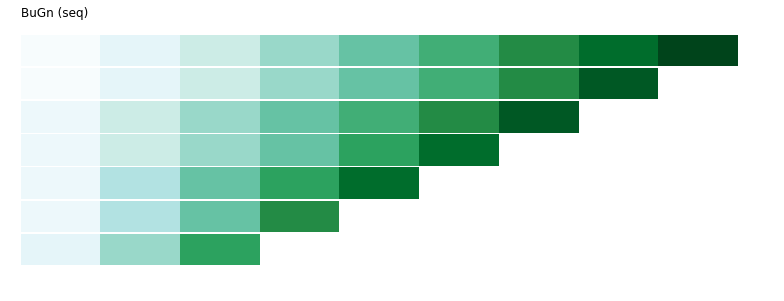

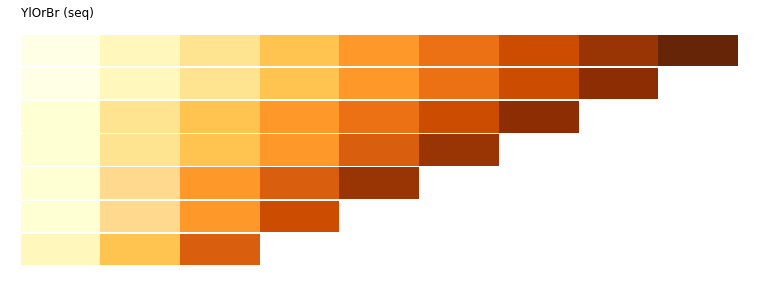

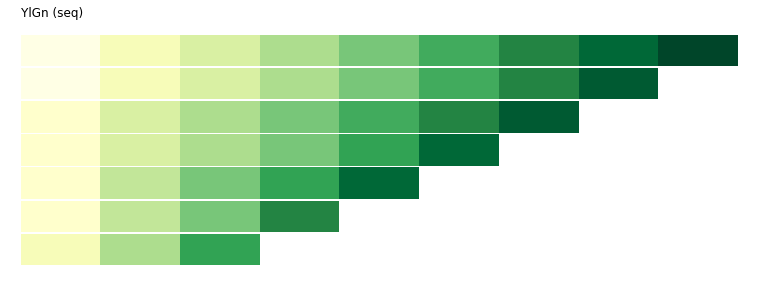

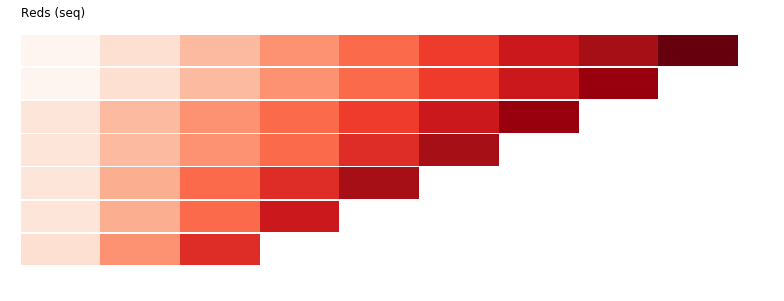

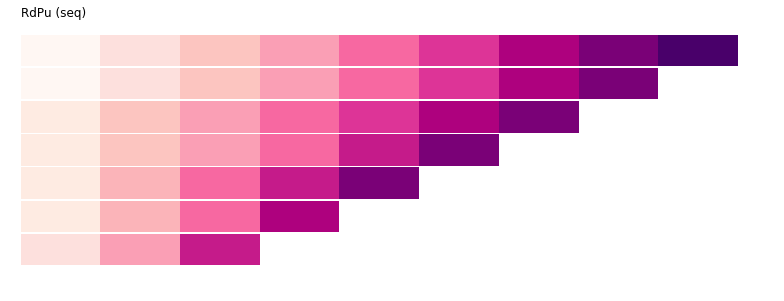

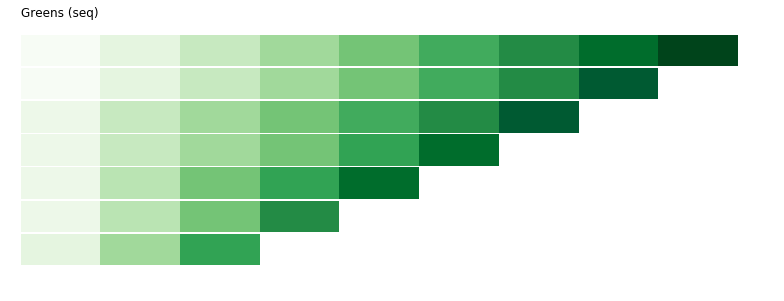

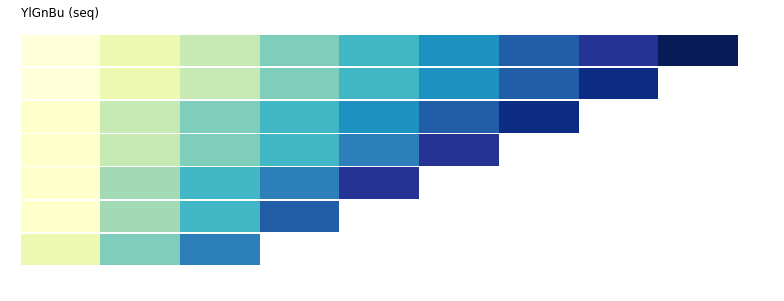

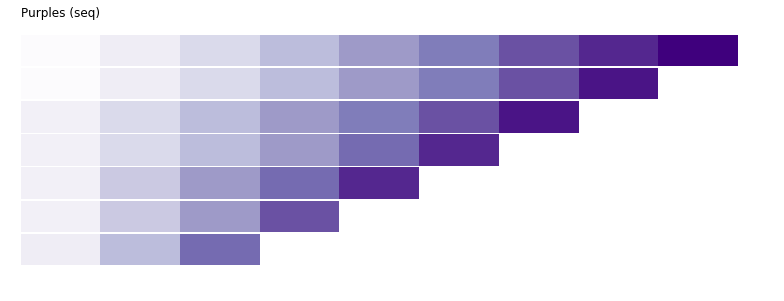

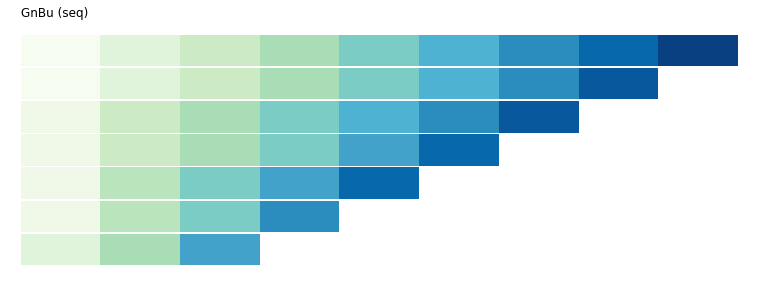

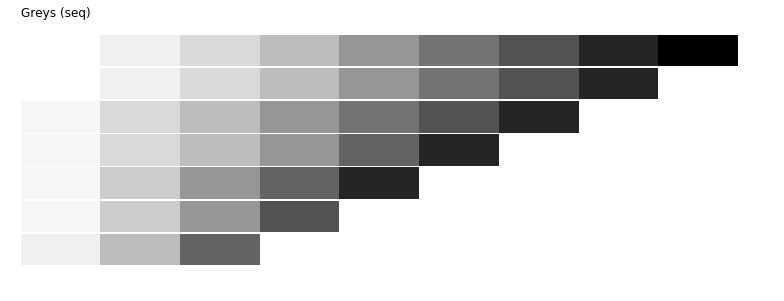

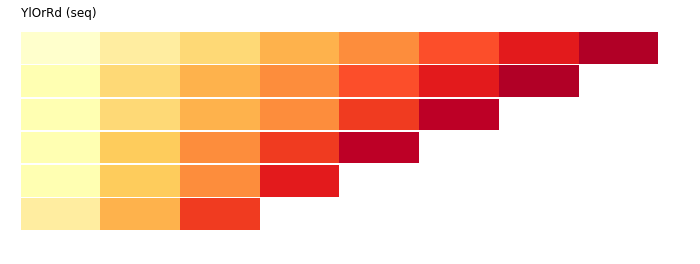

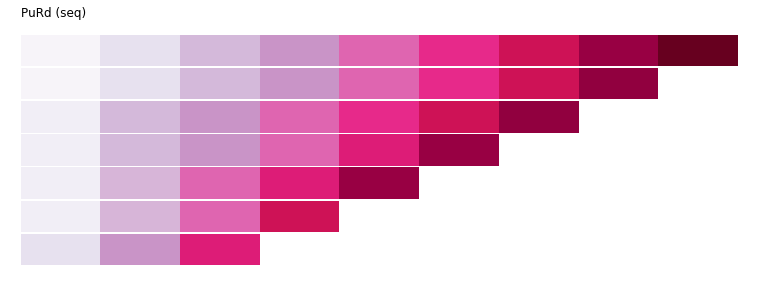

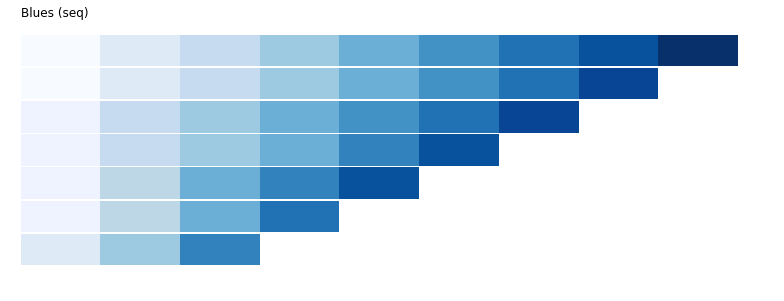

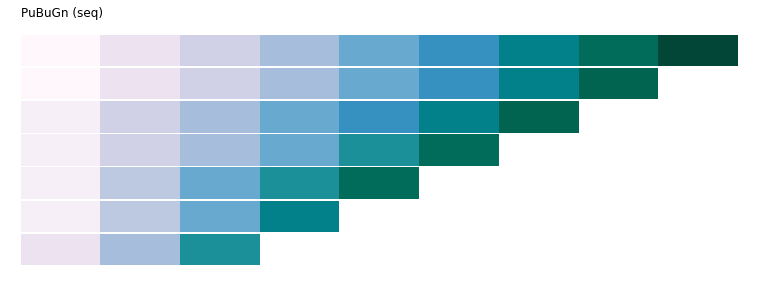

In [5]:
for title, group in colorbrewer.items():
    type = group['type']
    keys = list(group.keys())[:-1]
    
    rows = len(keys)
    cols = rows + 2
    fig, ax = plt.subplots(figsize=(cols*1.5, rows/1.5))    
    ax.set_axis_off()
    ax.set_title("{} ({})".format(title, type), loc='left')
    
    for idx, key in enumerate(keys):
        rgb_list = group[key]
        rgb_nums = len(rgb_list)
        
        rgbs = [str2rgb(text) for text in rgb_list]
        hexs = [rgb2hex(rgb) for rgb in rgbs]
        ax.barh(np.repeat(idx, rgb_nums), np.repeat(1, rgb_nums), 
                left=np.arange(rgb_nums), height=0.95, color=hexs)
    plt.show()


In [6]:
import pandas as pd

df = pd.DataFrame(columns=['nature', 'scheme', 'classes', 'hex', 'rgb'])

for scheme, group in colorbrewer.items():
    nature = group['type']
    classes = list(group.keys())[:-1]    
    for cls in classes:
        rgb_list = group[cls]
        rgb_nums = len(rgb_list)
        
        rgbs = [str2rgb(text) for text in rgb_list]
        hexs = [rgb2hex(rgb) for rgb in rgbs]
        print(nature, scheme, cls, hexs, rgbs)
        df.loc[len(df)] = [nature, scheme, cls, hexs, rgbs]


div Spectral 3 ['#fc8d59', '#ffffbf', '#99d594'] [(252, 141, 89), (255, 255, 191), (153, 213, 148)]
div Spectral 4 ['#d7191c', '#fdae61', '#abdda4', '#2b83ba'] [(215, 25, 28), (253, 174, 97), (171, 221, 164), (43, 131, 186)]
div Spectral 5 ['#d7191c', '#fdae61', '#ffffbf', '#abdda4', '#2b83ba'] [(215, 25, 28), (253, 174, 97), (255, 255, 191), (171, 221, 164), (43, 131, 186)]
div Spectral 6 ['#d53e4f', '#fc8d59', '#fee08b', '#e6f598', '#99d594', '#3288bd'] [(213, 62, 79), (252, 141, 89), (254, 224, 139), (230, 245, 152), (153, 213, 148), (50, 136, 189)]
div Spectral 7 ['#d53e4f', '#fc8d59', '#fee08b', '#ffffbf', '#e6f598', '#99d594', '#3288bd'] [(213, 62, 79), (252, 141, 89), (254, 224, 139), (255, 255, 191), (230, 245, 152), (153, 213, 148), (50, 136, 189)]
div Spectral 8 ['#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd'] [(213, 62, 79), (244, 109, 67), (253, 174, 97), (254, 224, 139), (230, 245, 152), (171, 221, 164), (102, 194, 165), (50, 136, 18

qual Set1 8 ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf'] [(228, 26, 28), (55, 126, 184), (77, 175, 74), (152, 78, 163), (255, 127, 0), (255, 255, 51), (166, 86, 40), (247, 129, 191)]
qual Set1 9 ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999'] [(228, 26, 28), (55, 126, 184), (77, 175, 74), (152, 78, 163), (255, 127, 0), (255, 255, 51), (166, 86, 40), (247, 129, 191), (153, 153, 153)]
qual Set3 3 ['#8dd3c7', '#ffffb3', '#bebada'] [(141, 211, 199), (255, 255, 179), (190, 186, 218)]
qual Set3 4 ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072'] [(141, 211, 199), (255, 255, 179), (190, 186, 218), (251, 128, 114)]
qual Set3 5 ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3'] [(141, 211, 199), (255, 255, 179), (190, 186, 218), (251, 128, 114), (128, 177, 211)]
qual Set3 6 ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462'] [(141, 211, 199), (255, 255, 179), (190, 186, 218), (251, 128

In [18]:
df['nature'].unique()

array(['div', 'qual', 'seq'], dtype=object)

In [16]:
df[df['nature']=="div"]["scheme"].unique()

array(['Spectral', 'RdYlGn', 'RdBu', 'PiYG', 'PRGn', 'RdYlBu', 'BrBG',
       'RdGy', 'PuOr'], dtype=object)

In [17]:
{"nature":nature for nature in df['nature'].unique()}

{'nature': 'seq'}